<h1 style='color:#00868b'>Read, balance and clean dataset<span class="tocSkip"></span></h1>

# Start

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Read dataset

In [2]:
df = pd.read_csv("complaints-2020-01-22_08_24.csv", encoding="utf-8")

In [3]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/23/19,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,926XX,None,Consent provided,Web,07/23/19,Closed with explanation,Yes,NaN,3315279
1,07/26/19,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...,Company believes it acted appropriately as aut...,"Ideal Collection Services, Inc.",FL,333XX,None,Consent provided,Web,07/26/19,Closed with explanation,Yes,NaN,3319487
2,06/03/19,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,Called multiple times over the years for a deb...,None,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,327XX,None,Consent provided,Web,06/07/19,Closed with explanation,Yes,NaN,3262794
3,07/03/19,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I sent in a letter to the company to have them...,None,"Diversified Consultants, Inc.",VA,232XX,None,Consent provided,Web,07/03/19,Closed with explanation,Yes,NaN,3295208
4,07/14/19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Received unsolicited financial product or insu...,On XX/XX/19 I applied for a Debt Relief Produc...,None,"ClearOne Advantage, LLC",PA,191XX,"Older American, Servicemember",Consent provided,Web,07/18/19,Closed with explanation,Yes,NaN,3306130


Example:

In [4]:
df["Consumer complaint narrative"][45144]

'I noticed a collection debt appear on my credit report earlier this week ( XX/XX/18 ). I XXXX XXXX the name of the company and looked up their website - I have never received anything in writing nor any phone calls ( that resulted in a voicemail - I do not answer calls from unknown numbers ) from this company about this debt. I contacted their settlement department via e-mail using the e-mail address on their website requesting more information about the debt owed, but have not received a response. I have no way to pay the debt if they do not send me the account information that is required for their website, which means it will remain on my credit report until it is sorted out.'

In [5]:
df.shape

(485701, 18)

## Data preprocessing

### Balancing the dataset

We will now balance the dataset, however leaving in outliers.

Text(0, 0.5, 'categories')

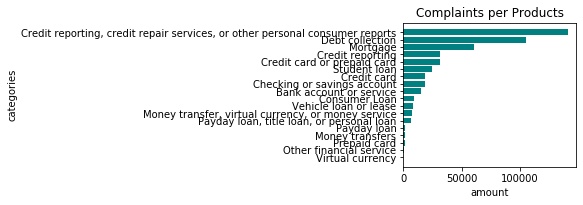

In [6]:
diff_products = df.groupby("Product")["Product"].count().sort_values(ascending=False)
fig = plt.figure()
plt.rcParams['figure.figsize'] = [30,15]
ax = fig.add_axes([0,0,0.4,0.5])

ax.barh(diff_products.index,diff_products,color='teal')
ax.invert_yaxis()
plt.title('Complaints per Products')
plt.xlabel('amount')
plt.ylabel('categories')

In [7]:
print(diff_products)

Product
Credit reporting, credit repair services, or other personal consumer reports    141742
Debt collection                                                                 105765
Mortgage                                                                         61094
Credit reporting                                                                 31588
Credit card or prepaid card                                                      31482
Student loan                                                                     24930
Credit card                                                                      18838
Checking or savings account                                                      18784
Bank account or service                                                          14885
Consumer Loan                                                                     9473
Vehicle loan or lease                                                             8079
Money transfer, virtual currency, o

In [8]:
df_bal1 = df.copy()

Clearly, the first three **Products** are overwhelming present.

In [9]:
indexNames = df_bal1[df_bal1["Product"] == "Credit reporting, credit repair services, or other personal consumer reports"].index
df_bal1.drop(indexNames, inplace=True)
indexNames = df_bal1[df_bal1["Product"] == "Debt collection"].index
df_bal1.drop(indexNames, inplace=True)
indexNames = df_bal1[df_bal1["Product"] == "Mortgage"].index
df_bal1.drop(indexNames, inplace=True)


df_bal1 = df_bal1.append(df.loc[df["Product"] == 'Credit reporting, credit repair services, or other personal consumer reports'].sample(frac=0.3))
df_bal1 = df_bal1.append(df.loc[df["Product"] == 'Debt collection'].sample(frac=0.3))
df_bal1 = df_bal1.append(df.loc[df["Product"] == 'Mortgage'].sample(frac=0.5))

Text(0, 0.5, 'categories')

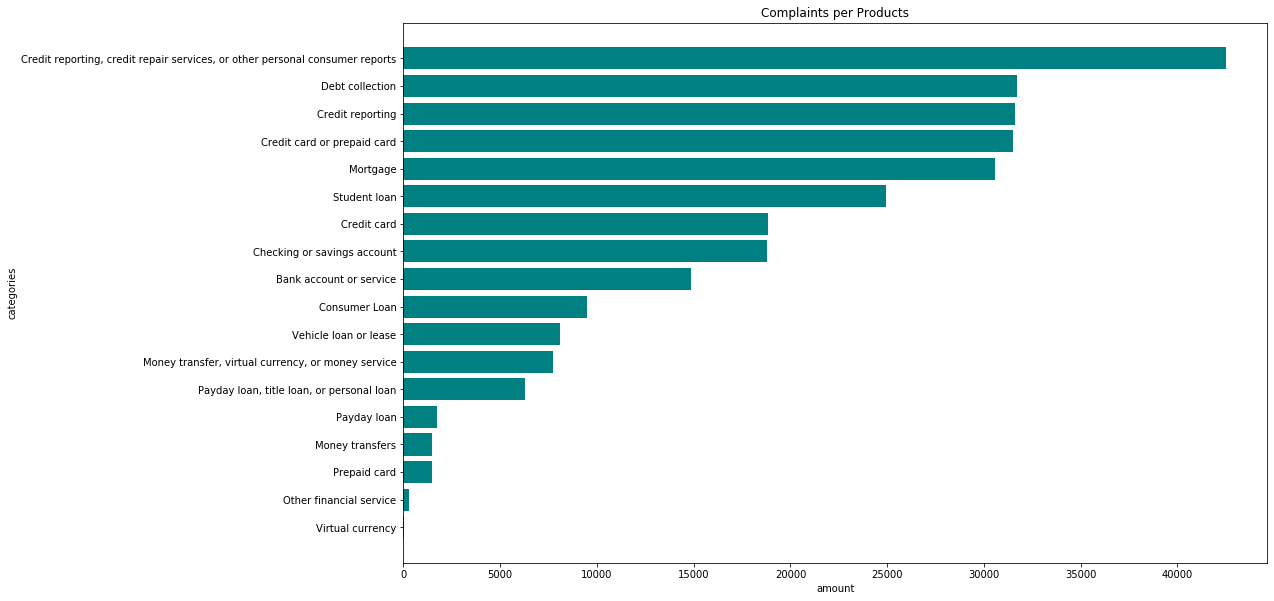

In [10]:
diff_products = df_bal1.groupby("Product")["Product"].count().sort_values(ascending=False)
fig = plt.figure()
plt.rcParams['figure.figsize'] = [30,15]
ax = fig.add_axes([0,0,0.4,0.5])

ax.barh(diff_products.index,diff_products,color='teal')
ax.invert_yaxis()
plt.title('Complaints per Products')
plt.xlabel('amount')
plt.ylabel('categories')

In [11]:
df_bal2 = df_bal1.copy()

In [12]:
print(diff_products)

Product
Credit reporting, credit repair services, or other personal consumer reports    42523
Debt collection                                                                 31730
Credit reporting                                                                31588
Credit card or prepaid card                                                     31482
Mortgage                                                                        30547
Student loan                                                                    24930
Credit card                                                                     18838
Checking or savings account                                                     18784
Bank account or service                                                         14885
Consumer Loan                                                                    9473
Vehicle loan or lease                                                            8079
Money transfer, virtual currency, or money ser

In [13]:
indexNames = df_bal2[df_bal2["Product"] == "Credit reporting, credit repair services, or other personal consumer reports"].index
df_bal2.drop(indexNames, inplace=True)
indexNames = df_bal2[df_bal2["Product"] == "Debt collection"].index
df_bal2.drop(indexNames, inplace=True)
indexNames = df_bal2[df_bal2["Product"] == "Credit reporting"].index
df_bal2.drop(indexNames, inplace=True)
indexNames = df_bal2[df_bal2["Product"] == "Credit card or prepaid card"].index
df_bal2.drop(indexNames, inplace=True)
indexNames = df_bal2[df_bal2["Product"] == "Mortgage"].index
df_bal2.drop(indexNames, inplace=True)
indexNames = df_bal2[df_bal2["Product"] == "Student loan"].index
df_bal2.drop(indexNames, inplace=True)

In [14]:
df_bal2 = df_bal2.append(df_bal1.loc[df_bal1["Product"] == 'Credit reporting, credit repair services, or other personal consumer reports'].sample(frac=0.45))
df_bal2 = df_bal2.append(df_bal1.loc[df_bal1["Product"] == 'Debt collection'].sample(frac=0.55))
df_bal2 = df_bal2.append(df_bal1.loc[df_bal1["Product"] == 'Credit reporting'].sample(frac=0.55))
df_bal2 = df_bal2.append(df_bal1.loc[df_bal1["Product"] == 'Credit card or prepaid card'].sample(frac=0.55))
df_bal2 = df_bal2.append(df_bal1.loc[df_bal1["Product"] == 'Mortgage'].sample(frac=0.58))
df_bal2 = df_bal2.append(df_bal1.loc[df_bal1["Product"] == 'Student loan'].sample(frac=0.6))

Text(0, 0.5, 'categories')

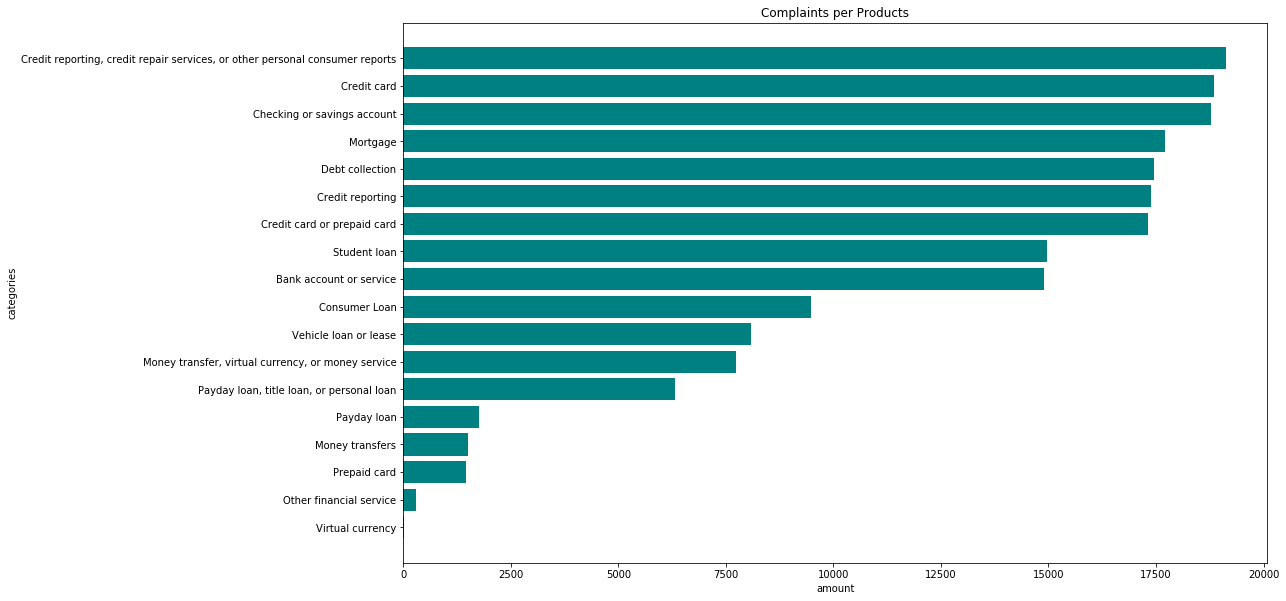

In [15]:
diff_products = df_bal2.groupby("Product")["Product"].count().sort_values(ascending=False)
fig = plt.figure()
plt.rcParams['figure.figsize'] = [30,15]
ax = fig.add_axes([0,0,0.4,0.5])

ax.barh(diff_products.index,diff_products,color='teal')
ax.invert_yaxis()
plt.title('Complaints per Products')
plt.xlabel('amount')
plt.ylabel('categories')

In [16]:
df_bal3 = df_bal2.copy()

In [17]:
print(diff_products)

Product
Credit reporting, credit repair services, or other personal consumer reports    19135
Credit card                                                                     18838
Checking or savings account                                                     18784
Mortgage                                                                        17717
Debt collection                                                                 17452
Credit reporting                                                                17373
Credit card or prepaid card                                                     17315
Student loan                                                                    14958
Bank account or service                                                         14885
Consumer Loan                                                                    9473
Vehicle loan or lease                                                            8079
Money transfer, virtual currency, or money ser

In [18]:
indexNames = df_bal3[df_bal3["Product"] == "Credit reporting, credit repair services, or other personal consumer reports"].index
df_bal3.drop(indexNames, inplace=True)
indexNames = df_bal3[df_bal3["Product"] == "Credit card"].index
df_bal3.drop(indexNames, inplace=True)
indexNames = df_bal3[df_bal3["Product"] == "Checking or savings account"].index
df_bal3.drop(indexNames, inplace=True)
indexNames = df_bal3[df_bal3["Product"] == "Mortgage"].index
df_bal3.drop(indexNames, inplace=True)
indexNames = df_bal3[df_bal3["Product"] == "Debt collection"].index
df_bal3.drop(indexNames, inplace=True)
indexNames = df_bal3[df_bal3["Product"] == "Credit reporting"].index
df_bal3.drop(indexNames, inplace=True)
indexNames = df_bal3[df_bal3["Product"] == "Credit card or prepaid card"].index
df_bal3.drop(indexNames, inplace=True)
indexNames = df_bal3[df_bal3["Product"] == "Student loan"].index
df_bal3.drop(indexNames, inplace=True)
indexNames = df_bal3[df_bal3["Product"] == "Bank account or service"].index
df_bal3.drop(indexNames, inplace=True)

In [19]:
df_bal3 = df_bal3.append(df_bal2.loc[df_bal2["Product"] == 'Credit reporting, credit repair services, or other personal consumer reports'].sample(n=10000))
df_bal3 = df_bal3.append(df_bal2.loc[df_bal2["Product"] == 'Credit card'].sample(n=10000))
df_bal3 = df_bal3.append(df_bal2.loc[df_bal2["Product"] == 'Checking or savings account'].sample(n=10000))
df_bal3 = df_bal3.append(df_bal2.loc[df_bal2["Product"] == 'Mortgage'].sample(n=10000))
df_bal3 = df_bal3.append(df_bal2.loc[df_bal2["Product"] == 'Debt collection'].sample(n=10000))
df_bal3 = df_bal3.append(df_bal2.loc[df_bal2["Product"] == 'Credit reporting'].sample(n=10000))
df_bal3 = df_bal3.append(df_bal2.loc[df_bal2["Product"] == 'Credit card or prepaid card'].sample(n=10000))
df_bal3 = df_bal3.append(df_bal2.loc[df_bal2["Product"] == 'Student loan'].sample(n=10000))
df_bal3 = df_bal3.append(df_bal2.loc[df_bal2["Product"] == 'Bank account or service'].sample(n=10000))

Text(0, 0.5, 'categories')

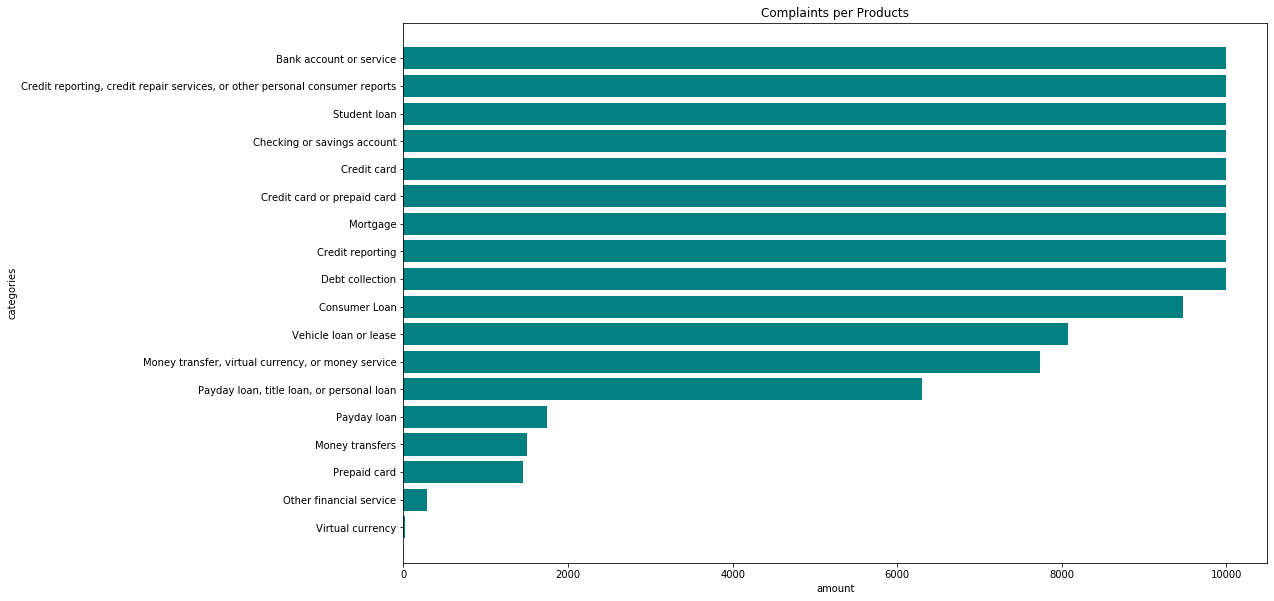

In [20]:
diff_products = df_bal3.groupby("Product")["Product"].count().sort_values(ascending=False)
fig = plt.figure()
plt.rcParams['figure.figsize'] = [30,15]
ax = fig.add_axes([0,0,0.4,0.5])

ax.barh(diff_products.index,diff_products,color='teal')
ax.invert_yaxis()
plt.title('Complaints per Products')
plt.xlabel('amount')
plt.ylabel('categories')

In [21]:
df = df_bal3.copy()

**Shape:**

In [22]:
df.shape

(126593, 18)

In [23]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
9,06/15/19,"Payday loan, title loan, or personal loan",Installment loan,Problem with the payoff process at the end of ...,None,They would not let me pay my loan off 2 days b...,None,"Big Picture Loans, LLC",IN,477XX,None,Consent provided,Web,06/15/19,Closed with explanation,Yes,NaN,3276316
12,07/25/19,"Payday loan, title loan, or personal loan",Installment loan,Charged fees or interest you didn't expect,None,Service Finance are liars and are charging me ...,None,"Service Finance Holdings, LLC",TX,None,None,Consent provided,Web,07/25/19,Closed with non-monetary relief,Yes,NaN,3318533
38,06/23/19,Vehicle loan or lease,Loan,Problems at the end of the loan or lease,Problem with paying off the loan,On XX/XX/XXXX I signed a car loan agreement to...,None,"HUNTINGTON NATIONAL BANK, THE",TX,750XX,None,Consent provided,Web,06/23/19,Closed with non-monetary relief,Yes,NaN,3284279
44,08/13/19,"Money transfer, virtual currency, or money ser...",Debt settlement,Fraud or scam,None,We hired XXXX XXXX and XXXX XXXX XXXX Debt Col...,None,ALLIED NATIONAL INC,NY,117XX,None,Consent provided,Web,08/13/19,Untimely response,No,NaN,3339246
52,07/31/19,"Payday loan, title loan, or personal loan",Payday loan,Problem with the payoff process at the end of ...,None,"I BORROWED {$200.00}, IN AN FINANCIAL EMERGENC...",Company believes it acted appropriately as aut...,"Harpeth Financial Services, LLC",TN,None,Servicemember,Consent provided,Web,08/02/19,Closed with explanation,Yes,NaN,3324772


### Cleaning the dataset

Example of uncleaned comment:

In [24]:
df["Consumer complaint narrative"][52]

'I BORROWED {$200.00}, IN AN FINANCIAL EMERGENCY, FROM XXXX XXXX XXXX OFFICE IN XXXX, TN, ON XX/XX/2019. THEN ON XXXX XXXX ; AT XXXX XXXX XXXX XXXX, XXXX, XXXX XXXX, IN XXXX XXXX, TN XXXX ; I WAS TOLD MY PAYOFF IS {$210.00}, SO I PAID {$210.00}. HOWEVER, I HAVE BEEN CHARGED MUCH MORE THAN {$210.00}, ON XXXX XXXX, I PAID OFF THE LOAN IN PERSON AND MY CHECKING ACCOUNT WAS ALSO DOUBLE BILLED /CHARGED ANOTHER {$45.00}, IN XXXX , TN. \nTODAY XX/XX/2019 I WENT INTO THE XXXX   XXXX OFFICE, IN XXXX, TN AND ASKED FOR THE REIMBURSEMENT OF MY OVERBILLED MONIES AND THE CLERK NAMED " XXXX \'\' REFUSED TO REFUND MY {$45.00} OVER/ DOUBLE BILLED CHARGES! \n\nXXXX THREATENED TO HAVE ME ARRESTED IF I DID NOT LET THE OFFICE KEEP THE MONIES. MY LOAN OF {$200.00} WAS JUST FOR 40 DAYS, I WAS FORCED TO PAY A TOTAL OF {$260.00}. \nI WAS OVERBILLED/ DOUBLE BILLED {$45.00}'

In [25]:
import re
import string

def clean_document(complaint):
    # turn text to lowercase
    complaint = complaint.lower()
    # remove URLs
    complaint = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', complaint)
    complaint = re.sub('https? ?: ?// ?(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', complaint)
    # removed censored words
    complaint = re.sub('[xxxx]{4}', '', complaint)
    complaint = re.sub('[XXXX]{4}', '', complaint)
    # remove normal dates and censored dates
    complaint = re.sub('[\dx]{0,2}/?[\dx]{0,2}/[\dx]{0,4}', '', complaint)
    # remove non-sensical characters
    complaint = re.sub('[\[\,\#\'\"\_\-\(\)\:\$\;\?\%\}\{\@\]\/\.\&\!\|]',' ', complaint)
    complaint = re.sub('\n', '', complaint)
    complaint = re.sub('\t', '', complaint)
    # remove numbers
    complaint = re.sub('[\d]', ' ', complaint)
    # normalise spaces to just one space
    complaint = re.sub(" +", " ", complaint);
    return complaint


In [26]:
df["Consumer complaint narrative"] = df["Consumer complaint narrative"].apply(clean_document)

Example of cleaned comment:

In [27]:
df["Consumer complaint narrative"][52]

'i borrowed in an financial emergency from office in tn on then on at in tn i was told my payoff is so i paid however i have been charged much more than on i paid off the loan in person and my checking account was also double billed charged another in tn today i went into the office in tn and asked for the reimbursement of my overbilled monies and the clerk named refused to refund my over double billed charges threatened to have me arrested if i did not let the office keep the monies my loan of was just for days i was forced to pay a total of i was overbilled double billed '

Export to CSV

In [28]:
df.to_csv("corpus_sprint3_balanced_cleaned_all.csv", index=True, index_label='Row No')